# Подготовка

## Загружаем библиотеки, читаем данные

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
import numpy as np
from datetime import datetime
from sklearn import preprocessing

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
df = pd.read_csv("/content/train_dataset_train.csv")

In [4]:
df.sort_index(axis=1, inplace = True)
df.head(1)

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.18715,0.072846,0.2623,0.261778,0.063134,0.062981,...,0.727516,0.0,0.754859,0.0,0.030883,0.0,0.658016,0.126832,0.034858,0.61477


## Достаем координаты

Для простоты будем использовать 1 точку из границ поля

In [5]:
# добавляем столбцы
df['len'] = 0.0
df['lot'] = 0.0

In [6]:
# Заполняем координаты
for i in range(len(df)):
  df['len'][i] = float(df['.geo'][i][df['.geo'][i].rfind('[')+1:df['.geo'][i].rfind(',')-1])
  df['lot'][i] = float(df['.geo'][i][df['.geo'][i].rfind(',')+1:df['.geo'][i].rfind(']]]')-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
df.head(1)

,.geo,area,crop,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,len,lot
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",20,3,3536,0.18715,0.072846,0.2623,0.261778,0.063134,0.062981,...,0.754859,0.0,0.030883,0.0,0.658016,0.126832,0.034858,0.61477,42.491073,51.414036


# Разбиваем данные

In [8]:
TRAIN_SIZE = 0.7 # Разделение данных на обучающую и контрольную части в пропорции 70/30%

y = df[['crop']]
X = df.drop(["id",".geo", "crop"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

# Случайный лес

## Выбор гиперпараметров

In [9]:
# Зависимость от кол-ва деревьев
n_trees = [100] + list(range(200, 1000, 200))
print(n_trees)
scoring = []
for n_tree in n_trees:
    estimator = RandomForestClassifier(n_estimators = n_tree, max_features = 7, random_state=1) #max_features = int(np.sqrt(X.shape[1]))
    score = model_selection.cross_val_score(estimator, X, ravel(y), cv = 10)    
    scoring.append(score)
    print(n_tree)
scoring = np.asmatrix(scoring)

[100, 200, 400, 600, 800]
100
200
400
600
800


In [10]:
scoring = np.asmatrix(scoring)

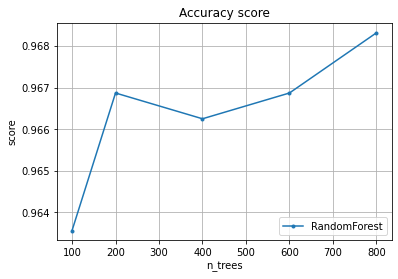

In [11]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [35]:
# Зависимость от кол-ва признаков
n_features = [6] + list(range(7, 10, 1))
print(n_features)
y = ravel(y)
scoring = []
for n_f in n_features:
    estimator = RandomForestClassifier(n_estimators = 250, max_features = n_f, random_state=1)
    score = model_selection.cross_val_score(estimator, X, y, cv = 10)    
    scoring.append(score)
    print(n_f)
scoring = np.asmatrix(scoring)

[6, 7, 8, 9]
6
7
8
9


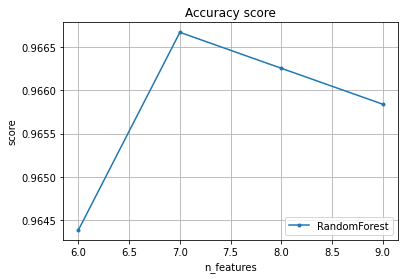

In [36]:
pylab.plot(n_features, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_features')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

## Обучение модели

In [45]:
estimator = RandomForestClassifier(n_estimators = 1000, max_features = 7, random_state=1)
estimator.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_features=7, n_estimators=10000, random_state=1)

In [10]:
from sklearn.metrics import recall_score

In [46]:
pred = estimator.predict(X_test)
print(estimator,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

RandomForestClassifier(max_features=7, n_estimators=10000, random_state=1) 
 0.9640709729732129


# Результат на отправку

In [47]:
# загружаем тестовый датасет
df_test = pd.read_csv("/content/test_dataset_test.csv")
df_test.sort_index(axis=1, inplace = True)
# добавляем столбцы
df_test['len'] = 0.0
df_test['lot'] = 0.0
# Заполняем координаты
for i in range(len(df_test)):
  df_test['len'][i] = float(df_test['.geo'][i][df_test['.geo'][i].rfind('[')+1:df_test['.geo'][i].rfind(',')-1])
  df_test['lot'][i] = float(df_test['.geo'][i][df_test['.geo'][i].rfind(',')+1:df_test['.geo'][i].rfind(']]]')-1])

df_nd = df.drop(["id",".geo", "len", "lot", "area"], axis = 1)

df_test.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 75 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   .geo                2071 non-null   object 
 1   area                2071 non-null   int64  
 2   id                  2071 non-null   int64  
 3   nd_mean_2021-04-15  2071 non-null   float64
 4   nd_mean_2021-04-16  2071 non-null   float64
 5   nd_mean_2021-04-18  2071 non-null   float64
 6   nd_mean_2021-04-19  2071 non-null   float64
 7   nd_mean_2021-04-20  2071 non-null   float64
 8   nd_mean_2021-04-22  2071 non-null   float64
 9   nd_mean_2021-04-23  2071 non-null   float64
 10  nd_mean_2021-04-25  2071 non-null   float64
 11  nd_mean_2021-04-26  2071 non-null   float64
 12  nd_mean_2021-04-27  2071 non-null   float64
 13  nd_mean_2021-04-28  2071 non-null   float64
 14  nd_mean_2021-04-29  2071 non-null   float64
 15  nd_mean_2021-04-30  2071 non-null   float64
 16  nd_mea

In [48]:
  df_test.head(1)

,.geo,area,id,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-22,nd_mean_2021-04-23,...,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23,nd_mean_2021-08-27,len,lot
0,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",26,611,0.083038,0.196691,0.244827,0.0,0.241219,0.259303,0.064947,...,0.593911,0.0,0.0,0.192016,0.16484,0.714292,0.06503,0.084197,35.965459,52.383788


In [49]:
# получаем предсказания
X_test = df_test.drop(["id",".geo"], axis = 1)
#X_test = preprocessing.normalize(X_test)
pred_test = estimator.predict(X_test)

In [50]:
len(pred_test)

2071

In [51]:
# Записываем файл
df_result = df_test.loc[:,["id"]]
df_result['crop'] = pred_test
df_result.to_csv('/content/solution.csv', index = False)